In [2]:
import numpy as np
import nengo
from nengo.utils.ensemble import tuning_curves
import matplotlib
import matplotlib.pyplot as plt
from nengo.processes import Piecewise

In [9]:
def simulate_dynamics(
        stim, feedback, T=1.0, dt=1e-3, tau=100e-3, tauProbe=10e-3, n_neurons=100):

    with nengo.Network(seed=581) as model:
        nd_stim = nengo.Node(stim)

        ens_x = nengo.Ensemble(
            n_neurons=n_neurons, dimensions=1)

        nengo.Connection(nd_stim, ens_x, synapse=tau)
        nengo.Connection(ens_x, ens_x, function=feedback, synapse=tau)

        p_stim = nengo.Probe(nd_stim)
        p_x = nengo.Probe(ens_x, synapse=tauProbe)

    with nengo.Simulator(model, dt=dt, progress_bar=None) as sim:
        sim.run(T)

    return \
        sim.trange(), \
        sim.data[p_stim], \
        sim.data[p_x]

In [28]:
def plot_dynamics(ts, us, xs, ax=None, show_legend=True, show_input=True, range_=1.75, label='State $x(t)$', tauProbe=10e-3):
    if ax is None:
        fig, ax = plt.subplots(figsize=(3.5, 3))
    else:
        fig = ax.get_figure()

    if show_input:
        ax.plot(ts, us, 'k--', label='$u(t)$')
        ax.plot(ts, nengo.Lowpass(tauProbe).filt(us, dt=1e-3), 'k:', label='$(u \\ast h)(t)$')
    ax.plot(ts, xs, label=label)
    if show_legend:
        ax.legend(
            ncol=2,
            handlelength=2.0,
            handletextpad=0.25,
            labelspacing=0.1,
            columnspacing=0.75
        )
    ax.set_xlabel('$t$ (s)')
    if isinstance(range_, tuple):
        ax.set_ylim(*range_)
    else:
        ax.set_ylim(-range_, range_)

    return fig, ax

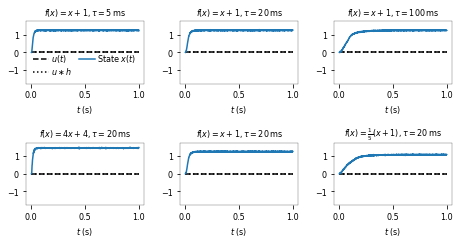

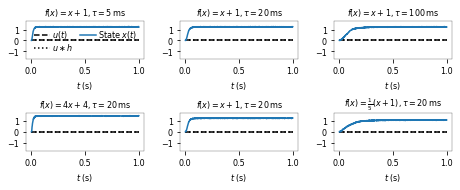

In [21]:
def mk_fxp1_fig(figsize=(6.5, 3.5)):
    fig, axs = plt.subplots(2, 3, figsize=figsize)

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: x + 1,
        tau=5e-3,
    ), ax=axs[0, 0])
    ax.set_title("$f(x) = x + 1, \\tau = 5\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: x + 1,
        tau=20e-3,
    ), ax=axs[0, 1], show_legend=False)
    ax.set_title("$f(x) = x + 1, \\tau = 20\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: x + 1,
    ), ax=axs[0, 2], show_legend=False)
    ax.set_title("$f(x) = x + 1, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: 4 * (x + 1),
        tau=5e-3,
    ), ax=axs[1, 0], show_legend=False)
    ax.set_title("$f(x) = 4x + 4, \\tau = 20\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: x + 1,
        tau=20e-3,
    ), ax=axs[1, 1], show_legend=False)
    ax.set_title("$f(x) = x + 1, \\tau = 20\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: 0.2 * x + 1,
    ), ax=axs[1, 2], show_legend=False)
    ax.set_title("$f(x) = \\frac{1}{5}(x + 1), \\tau = 20\,\\mathrm{ms}$");

    fig.tight_layout()
    return fig

mk_fxp1_fig().savefig('../fxp1_example.pdf', bbox_inches='tight', transparent=True)

fig = mk_fxp1_fig(figsize=(6.5, 2.75))
plt.subplots_adjust(hspace=1.4)
fig.savefig('../fxp1_example_small.pdf', bbox_inches='tight', transparent=True)

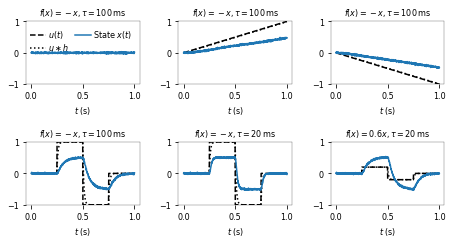

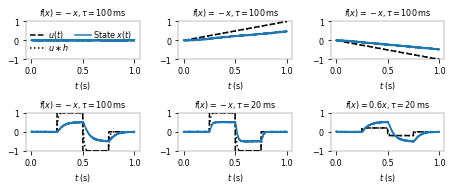

In [22]:
def mk_fmx_fig(figsize=(6.5, 3.5)):
    fig, axs = plt.subplots(2, 3, figsize=figsize)
    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: -x,
    ), ax=axs[0, 0], range_=1.0)
    ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: t,
        lambda x: -x,
    ), ax=axs[0, 1], show_legend=False, range_=1.0)
    ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: -t,
        lambda x: -x,
    ), ax=axs[0, 2], show_legend=False, range_=1.0)
    ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.25: 1.0,
            0.5: -1.0,
            0.75: 0.0,
        }),
        lambda x: -x,
    ), ax=axs[1, 0], show_legend=False, range_=1.0)
    ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");


    _, ax = plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.25: 1.0,
            0.5: -1.0,
            0.75: 0.0,
        }),
        lambda x: -x,
        tau=0.02,
    ), ax=axs[1, 1], show_legend=False, range_=1.0)
    ax.set_title("$f(x) = -x, \\tau = 20\,\\mathrm{ms}$");


    _, ax = plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.25: 0.2,
            0.5: -0.2,
            0.75: 0.0,
        }),
        lambda x: 0.6 * x,
        tau=0.02,
    ), ax=axs[1, 2], show_legend=False, range_=1.0)
    ax.set_title("$f(x) = 0.6 x, \\tau = 20\,\\mathrm{ms}$");

    fig.tight_layout()

    return fig

mk_fmx_fig().savefig('../fmx_example.pdf', bbox_inches='tight', transparent=True)

fig = mk_fmx_fig(figsize=(6.5, 2.75))
plt.subplots_adjust(hspace=1.4)
fig.savefig('../fmx_example_small.pdf', bbox_inches='tight', transparent=True)

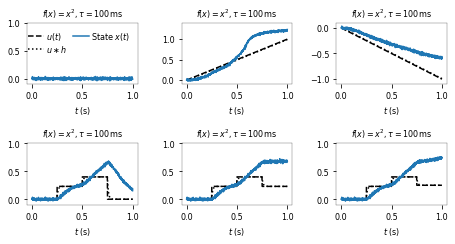

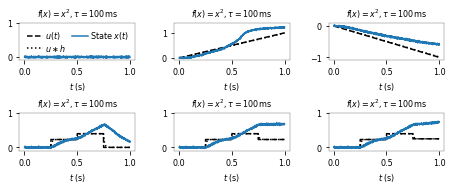

In [23]:
def mk_fxs_fig(figsize=(6.5, 3.5)):
    fig, axs = plt.subplots(2, 3, figsize=figsize)
    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: 0.0,
        lambda x: x**2,
        tau=0.1,
    ), ax=axs[0, 0], range_=(-0.1, 1.0))
    ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: t,
        lambda x: x**2,
        tau=0.1,
    ), ax=axs[0, 1], show_legend=False, range_=(-0.1, 1.4))
    ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        lambda t: -t,
        lambda x: x**2,
        tau=0.1,
    ), ax=axs[0, 2], show_legend=False, range_=(-1.1, 0.1))
    ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.25: 0.23,
            0.5: 0.4,
            0.75: 0
        }),
        lambda x: x**2,
        tau=0.1,
    ), ax=axs[1, 0], show_legend=False, range_=(-0.1, 1.0))
    ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

    _, ax = plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.25: 0.23,
            0.5: 0.4,
            0.75: 0.23,
        }),
        lambda x: x**2,
        tau=0.1,
        T=1.0,
    ), ax=axs[1, 1], show_legend=False, range_=(-0.1, 1.0))
    ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");


    _, ax = plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.25: 0.23,
            0.5: 0.4,
            0.75: 0.25,
        }),
        lambda x: x**2,
        tau=0.1,
        T=1.0,
    ), ax=axs[1, 2], show_legend=False, range_=(-0.1, 1.0))
    ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

    fig.tight_layout()
    return fig

mk_fxs_fig().savefig('../fxs_example.pdf', bbox_inches='tight', transparent=True)

fig = mk_fxs_fig(figsize=(6.5, 2.75))
plt.subplots_adjust(hspace=1.4)
fig.savefig('../fxs_example_small.pdf', bbox_inches='tight', transparent=True)

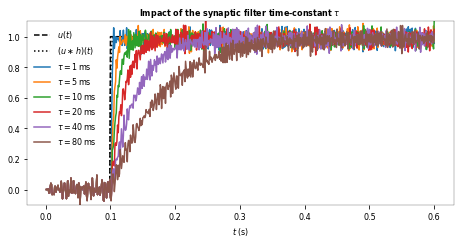

In [29]:
fig, ax = plt.subplots(figsize=(6.5, 3.5))
for i, tau in enumerate([1, 5, 10, 20, 40, 80]):
    plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.1: 1.0,
        }),
        lambda x: 0,
        tau=tau * 1e-3,
        tauProbe=1e-3,
        n_neurons=1000,
        T = 0.6
    ), ax=ax,
       show_legend=False,
       show_input=i==0,
       tauProbe=1e-3,
       range_=(-0.1, 1.1),
       label="$\\tau = {}\\,\\mathrm{{ms}}$".format(tau))
ax.legend()
ax.set_title('Impact of the synaptic filter time-constant $\\tau$')

fig.tight_layout()
fig.savefig('../synaptic_filter.pdf', bbox_inches='tight', transparent=True)